In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris= load_iris()
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["answer"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
# Step1. 資料分成兩份
from sklearn.model_selection import train_test_split
# [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(iris["data"], 
                                                    iris["target"],
                                                    test_size=0.1)

In [3]:
# Step2. 準備方法_分類
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
#解決過擬合

In [4]:
# Step3. 做考古題(fit)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
# Step4. 答題(predict)
pre = clf.predict(x_test)
pre

array([1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0])

In [6]:
# Step5. 驗證模型(accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(pre, y_test)

0.8666666666666667

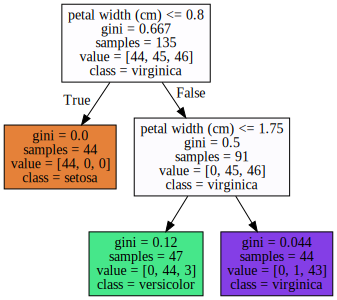

In [7]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(clf, 
                   feature_names=iris["feature_names"],
                   class_names=iris["target_names"],
                   filled=True)
graphviz.Source(g)